# HW1 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2017
#### Due : 3/16 (THU)  11:59 PM 












## Fetching infant mortality rate data from Wikipedia

In this example we will fetch data about countries and their infant mortality rate from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_infant_mortality_rate has several tables for individual countries, subcontinents as well as different years. 


###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### print html code of presented page

> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of countries by infant mortality rate - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

##### Use requests library


In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_infant_mortality_rate'

# write your code here
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by infant mortality rate - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_infant_mortality_rate","wgTitle":"List of countries by infant mortality rate","wgCurRevisionId":766812539,"wgRevisionId":766812539,"wgArticleId":2525954,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: dates","Lists of countries","Population","Health by country","Death by country","Deaths by country"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTrans

## 1. Parsing html data

Data that we are going to use is table titled below:

#### Title: List by the United Nations population division

*print html code of parsed table: List by the United Nations population division*

> *`<table class="class1 class2">`*<br/>
> *`<tr>`*<br/>
> *`<th>#</th>`*<br/>
> *`<th>Country or territory</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

##### Use BeautifulSoup
*hint: class/id can be assigned for elements of html.


In [3]:
"""Parse html and return html tables of wikipedia mortality data."""

#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"
    
# write your code here
letters = soup.find_all("table", {"class":"sortable wikitable"})
firstResult = letters[1]
print(firstResult)

<table class="sortable wikitable" style="text-align:right">
<tr>
<th>#</th>
<th><small>Country or territory<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[Note 1]</a></sup></small></th>
<th><small>1950 /<br/>
1955</small></th>
<th><small>1955 /<br/>
1960</small></th>
<th><small>1960 /<br/>
1965</small></th>
<th><small>1965 /<br/>
1970</small></th>
<th><small>1970 /<br/>
1975</small></th>
<th><small>1975 /<br/>
1980</small></th>
<th><small>1980 /<br/>
1985</small></th>
<th><small>1985 /<br/>
1990</small></th>
<th><small>1990 /<br/>
1995</small></th>
<th><small>1995 /<br/>
2000</small></th>
<th><small>2000 /<br/>
2005</small></th>
<th><small>2005 /<br/>
2010</small></th>
<th><small>2010 /<br/>
2015</small></th>
<th><small>&lt;-CIA</small></th>
</tr>
<tr id="UN_Singapore">
<td>1</td>
<td style="text-align:right;"><a href="/wiki/Singapore" title="Singapore">Singapore</a></td>
<td style="background:#1e1e1e;"><span style="color:#e9e9e9;">60.99</span></td>
<td style="background

## 2. Extracting data and filling it into a dictionary(Python data stucture)

#### Extract mortality data for countries from table and store it in dictionary.
*Please print parsed dictionary at the end of code*

##### Shape of Dictionary
- { *country_name*: { *year*: *infant mortality rate*}}
- e.g. {'Slovenia': {'1950 - 1955':22.77, '1955 - 1960':18.7, ... }, 'Italy':{'1950 - 1955': ... }, ... }

In [5]:
# extract headings and actual data and combine data into single dict
tempSecond = firstResult.find_all("td")

count = 0
country_name = ""
year = ['1950 /\n1955', '1955 /\n1960', '1960 /\n1965', '1965 /\n1970', '1970 /\n1975', 
        '1975 /\n1980', '1980 /\n1985', '1985 /\n1990', '1990 /\n1995', '1995 /\n2000', '2000 /\n2005',
       '2005 /\n2010', '2010 /\n2015']
items = {}
result = {}
# write your code here
for i in tempSecond:
    if i.text == "<-\"":
        count = 0
        continue
    if count == 1:
        country_name = i.text
    else:
        items[year[count-2]] = float(i.text)
        if count == 14:
            result[country_name] = items
            items = {}
    count = count + 1

print(result)

{u'Canada': {'1985 /\n1990': 7.51, '2000 /\n2005': 5.24, '1995 /\n2000': 5.47, '1950 /\n1955': 38.5, '1955 /\n1960': 32.59, '2010 /\n2015': 4.73, '1965 /\n1970': 21.27, '1970 /\n1975': 16.77, '1980 /\n1985': 9.24, '1975 /\n1980': 12.61, '2005 /\n2010': 5.13, '1960 /\n1965': 26.53, '1990 /\n1995': 6.33}, u'East Timor': {'1985 /\n1990': 141.46, '2000 /\n2005': 63.99, '1995 /\n2000': 84.75, '1950 /\n1955': 264.61, '1955 /\n1960': 241.82, '2010 /\n2015': 43.91, '1965 /\n1970': 201.22, '1970 /\n1975': 183.36, '1980 /\n1985': 183.65, '1975 /\n1980': 253.8, '2005 /\n2010': 50.16, '1960 /\n1965': 220.83, '1990 /\n1995': 118.77}, u'Sao Tome and Principe': {'1985 /\n1990': 60.54, '2000 /\n2005': 51.86, '1995 /\n2000': 54.64, '1950 /\n1955': 124.52, '1955 /\n1960': 112.38, '2010 /\n2015': 43.51, '1965 /\n1970': 88.13, '1970 /\n1975': 76.06, '1980 /\n1985': 63.63, '1975 /\n1980': 64.93, '2005 /\n2010': 46.05, '1960 /\n1965': 99.0, '1990 /\n1995': 57.53}, u'Turkmenistan': {'1985 /\n1990': 81.03, '2

## 3. Creating a dataframe(Python data structure) from a dictionary

* Shape of dataframe must be like following table.
* i.e. indices: countries, columns: period
<table>
  <tr>
    <th></th>
    <th>1950 /<br>1955</th>
    <th>1955 /<br>1960</th>
    <th>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
    <th>2010 /<br>2015</th>
  </tr>
  <tr>
    <td>Singapore</td>
    <td>60.99</td>
    <td>43.2</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>1.77</td>
  </tr>
  <tr>
    <td>Iceland</td>
    <td>21.43</td>
    <td>18.5</td>
    <td></td>
    <td>2.03</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Sierra Leone</td>
    <td>236.9</td>
    <td>229.39</td>
    <td></td>
    <td>94.43</td>
  </tr>
</table>

In [6]:
# create dataframe
# Use the following code
# indices: countries, columns: period

df = pd.DataFrame.from_dict(result, orient='index')

# sort based on year
df.sort_index(axis=1,inplace=True)
df

,1950 / 1955,1955 / 1960,1960 / 1965,1965 / 1970,1970 / 1975,1975 / 1980,1980 / 1985,1985 / 1990,1990 / 1995,1995 / 2000,2000 / 2005,2005 / 2010,2010 / 2015
Afghanistan,280.98,256.27,234.26,216.07,198.77,180.32,159.16,134.14,111.31,98.68,89.53,79.51,71.12
Albania,144.92,124.94,98.95,76.97,57.99,46.85,43.20,37.84,30.74,26.30,20.25,16.11,14.42
Algeria,163.06,153.57,142.88,132.35,122.25,105.50,75.37,55.38,47.67,41.92,37.45,34.18,30.28
Angola,230.82,215.04,200.16,186.20,173.03,160.95,157.11,153.18,150.66,138.01,116.05,104.35,96.22
Argentina,63.93,58.80,59.76,57.41,48.12,39.08,32.20,27.13,24.36,21.85,15.04,14.61,13.69
Armenia,83.00,78.00,73.01,68.01,62.99,57.99,52.98,47.99,44.12,35.02,27.00,21.01,13.22
Australia,23.69,21.34,19.72,17.99,16.96,12.76,9.86,8.79,6.74,5.52,4.94,4.48,3.96
Austria,55.11,43.20,32.78,26.43,24.32,16.90,12.55,9.47,7.12,4.81,4.52,3.78,3.09
Azerbaijan,120.05,115.04,110.05,105.05,100.02,95.03,90.00,85.00,81.83,61.28,52.01,41.06,39.60
Bahamas,70.58,58.31,48.14,39.72,32.76,27.00,22.24,18.31,15.56,14.16,11.58,10.04,9.06


## 3-1. Some data accessing functions for a panda dataframe

In [7]:
# Use the following code

subtable = df.iloc[0:5, 0:5]
print "<subtable>"
print subtable
print "end of subtable\n\n"

column = df['1955 /\n1960']
print "<column>"
print column
print "end of column\n\n"

column = df[['1955 /\n1960', '1960 /\n1965', '1965 /\n1970']]
print "<columns>"
print column
print "end of columns\n\n"


row = df.ix[0] #row 0
print "<row>"
print row
print "end of row\n\n"

rows = df.ix[:2] #rows 0,1
print "<rows>"
print rows
print "end of rows\n\n"

element = df.ix[0,'1955 /\n1960'] #element
print "<element>"
print element
print "end of element\n\n"

# max along column
print "<max>"
print df['1950 /\n1955'].max()
print "end of max\n\n"

# axes
print "<axes>"
print df.axes
print "end of axes\n\n"

row = df.ix[0]
print "<row info>"
print row.name
print row.index
print "end of row info\n\n"

countries =  df.index
print "<countries>"
print countries
print "end of countries\n\n"

print "<row: Austria>"
print df.ix['Austria']
print "end of row\n\n"

<subtable>
             1950 /\n1955  1955 /\n1960  1960 /\n1965  1965 /\n1970  \
Afghanistan        280.98        256.27        234.26        216.07   
Albania            144.92        124.94         98.95         76.97   
Algeria            163.06        153.57        142.88        132.35   
Angola             230.82        215.04        200.16        186.20   
Argentina           63.93         58.80         59.76         57.41   

             1970 /\n1975  
Afghanistan        198.77  
Albania             57.99  
Algeria            122.25  
Angola             173.03  
Argentina           48.12  
end of subtable


<column>
Afghanistan                 256.27
Albania                     124.94
Algeria                     153.57
Angola                      215.04
Argentina                    58.80
Armenia                      78.00
Australia                    21.34
Austria                      43.20
Azerbaijan                  115.04
Bahamas                      58.31
Bahrain          

## 4-1. Print top 5 countries with the highest/lowest infant mortality rate in 1950-1955. (total 10 countries)

In [8]:
# write your code here
fiveHighest = df.nlargest(5, '1950 /\n1955')
print "<Highest>"
for item in fiveHighest.index:
    print item

fiveLowest = df.nsmallest(5, '1950 /\n1955')
print "\n<Lowest>"
for item in fiveLowest.index:
    print item

<Highest>
Afghanistan
Bhutan
Côte d'Ivoire
East Timor
Pakistan

<Lowest>
Sweden
Iceland
Norway
Slovenia
Netherlands


## 4-2. Print top 5 countries with the lowest infant mortality rate in 1990-2015.
##### * Extract the lowest 5 countries based on the mean of a given period

In [9]:
# write your code here
temp = df[['1990 /\n1995', '1995 /\n2000', '2000 /\n2005', '2005 /\n2010', '2010 /\n2015']]
idx = temp.sum(axis=1).sort_values(ascending=True).head(5).index

print "<top 5 countries with the lowest infant mortality rate in 1990-2015>"
for item in df.ix[idx].index:
    print item

<top 5 countries with the lowest infant mortality rate in 1990-2015>
Singapore
Iceland
Japan
Finland
Sweden


## 5-1. Create a sub-dataframe for the five countries extracted in question 4-2.
<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">1950 /<br>1955</th>
    <th class="tg-yw4l">1955 /<br>1960</th>
    <th class="tg-baqh">...</th>
    <th class="tg-yw4l">2010 /<br>2015</th>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 1   </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">       ...       </td>
    <td class="tg-yw4l">                    </td>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 2</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-baqh">...</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 5</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
</table>

In [10]:
# write your code here
resultFour = df.ix[idx]
resultFour

,1950 / 1955,1955 / 1960,1960 / 1965,1965 / 1970,1970 / 1975,1975 / 1980,1980 / 1985,1985 / 1990,1990 / 1995,1995 / 2000,2000 / 2005,2005 / 2010,2010 / 2015
Singapore,60.99,43.20,28.62,23.79,19.35,12.85,8.76,5.48,4.64,4.08,2.50,2.16,1.77
Iceland,21.43,18.50,16.74,13.41,11.85,9.42,6.40,5.62,4.79,4.01,2.62,2.01,2.03
Japan,50.07,37.25,25.84,16.48,11.95,8.75,6.63,4.96,4.44,3.75,3.03,2.59,2.20
Finland,34.47,26.07,19.53,15.08,11.95,8.77,6.50,6.01,5.11,3.86,3.28,2.77,2.26
Sweden,19.71,16.97,15.63,12.53,10.53,7.92,6.78,6.17,5.34,3.64,3.33,2.49,2.80


## 5-2. Plot broken-line chart using dataframe that created from problem 5-1.

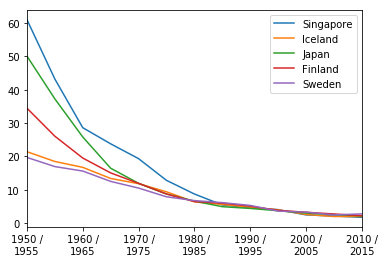

In [11]:
# Use the following code
resultFour.transpose().plot(legend='True')